# Data Validation and Quality Checks

This notebook validates dataset quality before performing statistical and inferential analysis.
Although the dataset appears clean, validation checks are performed to ensure data reliability and analytical consistency.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("../data/raw/global_cancer_patients.csv")

data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [4]:
data.shape

(50000, 15)

The dataset contains 50,000 records with consistent structure, confirming successful data loading.

In [6]:
data.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

All variables have appropriate data types. Numerical variables are correctly stored as numeric formats, while categorical variables are stored as object types.

In [7]:
data.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

No missing values were detected across columns, indicating high data completeness.

In [8]:
data.duplicated().sum()

np.int64(0)

No duplicate records were identified. Each patient entry is unique.

In [9]:
data.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


All numerical variables fall within reasonable ranges:

- Age values represent adult populations.
- Risk factors range between expected scaled values.
- Treatment costs are positive.
- Survival years and severity scores remain within logical bounds.

In [13]:
data["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [14]:
data["Cancer_Stage"].unique()

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

In [15]:
data["Country_Region"].unique()

array(['UK', 'China', 'Pakistan', 'Brazil', 'Germany', 'Canada', 'USA',
       'India', 'Australia', 'Russia'], dtype=object)

Categorical variables show consistent labeling with no spelling inconsistencies or unexpected categories.

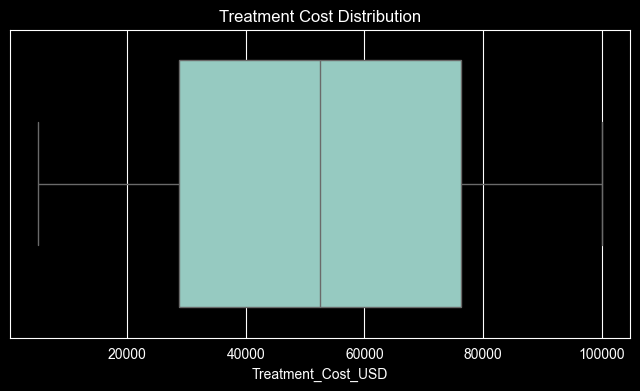

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data["Treatment_Cost_USD"])
plt.title("Treatment Cost Distribution")
plt.show()

Treatment costs show natural variability without extreme abnormal values. No corrective action is required.

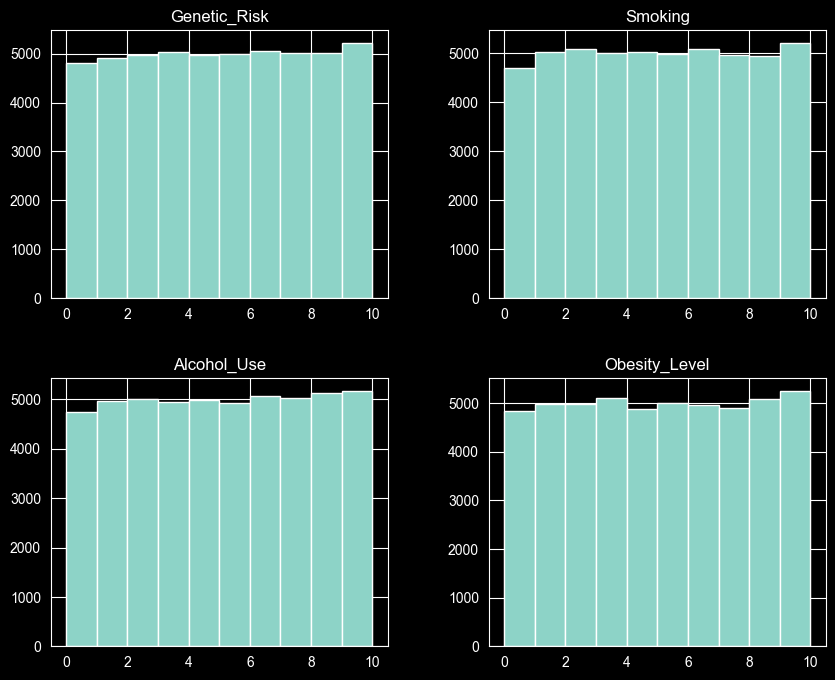

In [17]:
data[["Genetic_Risk","Smoking","Alcohol_Use","Obesity_Level"]].hist(figsize=(10,8))
plt.show()

Risk factor variables appear evenly distributed, supporting unbiased statistical analysis.

## Final Validation Summary

The dataset demonstrates strong data quality with:

- No missing values
- No duplicate records
- Valid numerical ranges
- Consistent categorical labels
- No critical outliers requiring treatment

Therefore, no major data cleaning or transformation is required.
The dataset is ready for inferential statistical analysis.